                                 DATS 6103 Section - 10
                     Individual Project 2 - Govinda Lal Banjade
                            The George Washington University
                              
                                    Submitted to Prof. Dr. Nima Zahadat
    

In [1]:
# Importing and loading required libraries.
import pandas as pd
import matplotlib.pyplot as pp
import matplotlib
from matplotlib import cm
matplotlib.style.use('ggplot')
import numpy as np
import math


In [2]:
# Sign in to plotly.plotly.
import plotly
import plotly.plotly as py
py.sign_in('govindabanjade', 'SadiC2oYc70A3juPEudx')
print(plotly.__version__)
plotly.offline.init_notebook_mode()
import plotly.graph_objs as go

2.0.11


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
# Loading and reading the excel file which has world wide healthcare expenditure per capita
# of each countries in millions of us dollars at current us prices.
# Data Source: www.worldbank.org/World Development Indicators
# Last Updated Date 10/30/2017

Data = (pd.read_excel('API_SH.XPD.PCAP_DS2_en_excel2_v2-3-8.xls',skiprows = 3, sep=',')).set_index('Country')
Data.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Health expenditure per capita (current US$),SH.XPD.PCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,Health expenditure per capita (current US$),SH.XPD.PCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.988947,33.805189,43.525440,52.885761,52.382549,58.168031,53.365973,56.574527,NaN,NaN
Angola,AGO,Health expenditure per capita (current US$),SH.XPD.PCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.602519,163.116051,160.835478,131.796211,160.360723,168.027217,225.736592,179.357854,NaN,NaN
Albania,ALB,Health expenditure per capita (current US$),SH.XPD.PCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,216.943081,254.735035,238.070979,219.273857,255.255600,239.512868,253.341896,272.204292,NaN,NaN
Andorra,AND,Health expenditure per capita (current US$),SH.XPD.PCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2997.572747,3081.870220,2897.932041,3173.991691,2794.502813,2993.730107,4914.391178,3746.334157,NaN,NaN


In [4]:
# Displaying the world wide health expenditure per capita of each countries
# in current US Dollar from 2002-2014.
Data_healpc =((pd.read_excel('API_SH.XPD.PCAP_DS2_en_excel2_v2-3-8.xls', skiprows = 3,sep=',',
     usecols=(0, 46,47,48,49,50,51,52,53,54,55,56,57,58))).fillna(0)).set_index('Country')
Data_healpc.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,,
Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Afghanistan,15.481904,19.332368,20.890002,21.895803,22.181409,26.988947,33.805189,43.525440,52.885761,52.382549,58.168031,53.365973,56.574527
Angola,28.190597,37.448429,53.456437,64.685192,102.379225,106.602519,163.116051,160.835478,131.796211,160.360723,168.027217,225.736592,179.357854
Albania,89.916155,112.630118,153.262550,166.227929,175.461113,216.943081,254.735035,238.070979,219.273857,255.255600,239.512868,253.341896,272.204292
Andorra,1450.796471,1827.841755,2127.736748,2089.667762,2256.103002,2997.572747,3081.870220,2897.932041,3173.991691,2794.502813,2993.730107,4914.391178,3746.334157


In [5]:
# Extracting the [world's] health expenditure per capita in current US Dollars from 2002-2014.
world_heal = Data_healpc.loc["World"] 
world_heal

2002     535.112069
2003     601.370066
2004     661.494785
2005     706.278711
2006     748.052822
2007     821.135205
2008     894.579151
2009     905.613221
2010     947.175431
2011    1017.058967
2012    1024.195388
2013    1038.697093
2014    1058.517824
Name: World, dtype: float64

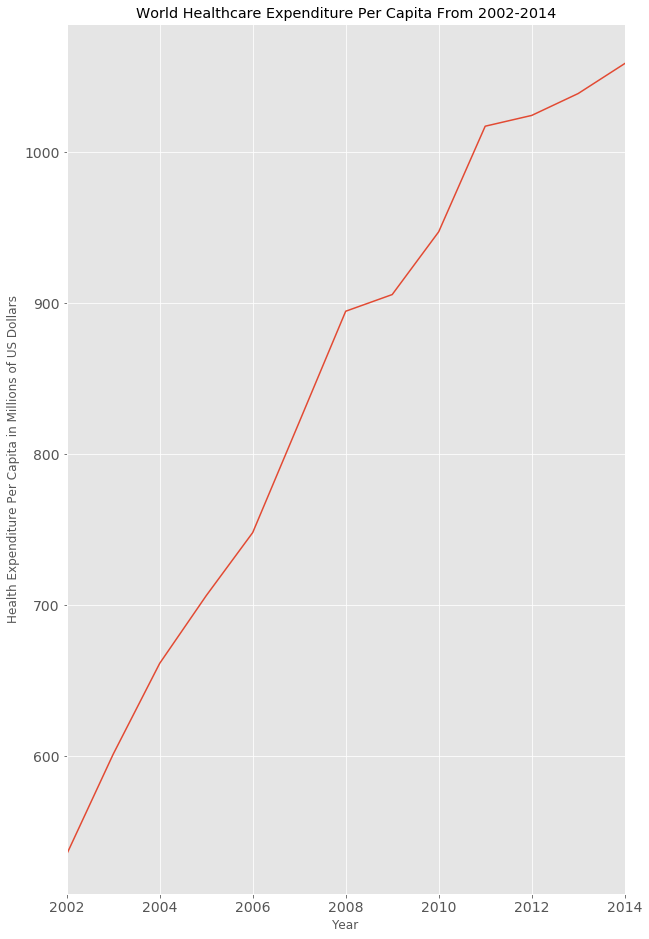

In [6]:
# Plotting world's healthcare expenditure percapita in a line graph.
world_heal_plot = world_heal.plot.line(legend = False, fontsize = 14, figsize=(10,16),
                        title ='World Healthcare Expenditure Per Capita From 2002-2014')
world_heal_plot.set_ylabel('Health Expenditure Per Capita in Millions of US Dollars')
world_heal_plot.set_xlabel('Year')
pp.show()

In [7]:
# Loading and reading the excel file which has world wide mortality rate, 
# infant(per 1,000 live births) of each countries.
# Data Source: www.worldbank.org/World Development Indicators
# Last Updated Date	10/30/2017
Data1_M = pd.read_excel('API_SP.DYN.IMRT.IN_DS2_en_excel2_v2-6-2.xls',skiprows = 3, sep=',')
Data1_M.head()    

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,245.7,241.2,236.9,232.7,228.5,224.4,...,73.4,70.8,68.2,65.7,63.3,61.0,58.8,56.8,54.9,53.2
2,Angola,AGO,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.9,85.6,80.3,75.4,70.7,66.5,62.7,59.5,56.9,54.6
3,Albania,ALB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.7,16.0,15.4,14.8,14.3,13.8,13.3,12.9,12.5,12.0
4,Andorra,AND,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2,3.1,3.0,2.9,2.9,2.8,2.7,2.6,2.5,2.4


In [8]:
# Extracting and displaying the world wide mortality rate, infant(per 1,000 live births)
# for each countries from 2002-2014.
Data1_MIPB = ((pd.read_excel('API_SP.DYN.IMRT.IN_DS2_en_excel2_v2-6-2.xls',skiprows = 3, sep=',',
    usecols=(0, 46,47,48,49,50,51,52,53,54,55,56,57, 58))).fillna(0)).set_index('Country')
Data_MIPB = Data1_MIPB
Data1_MIPB.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,,
Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,86.1,83.6,81.1,78.5,76.0,73.4,70.8,68.2,65.7,63.3,61.0,58.8,56.8
Angola,115.8,111.3,106.6,101.5,96.3,90.9,85.6,80.3,75.4,70.7,66.5,62.7,59.5
Albania,20.9,20.0,19.0,18.2,17.4,16.7,16.0,15.4,14.8,14.3,13.8,13.3,12.9
Andorra,3.7,3.6,3.5,3.3,3.3,3.2,3.1,3.0,2.9,2.9,2.8,2.7,2.6


In [9]:
# Extracting the [world's] mortality rate, infant per 1,000 live births from 2002-2014.
world_Mort = Data1_MIPB.loc["World"]
world_Mort

2002    50.3
2003    48.6
2004    46.9
2005    45.1
2006    43.4
2007    41.8
2008    40.3
2009    38.8
2010    37.4
2011    36.0
2012    34.7
2013    33.6
2014    32.4
Name: World, dtype: float64

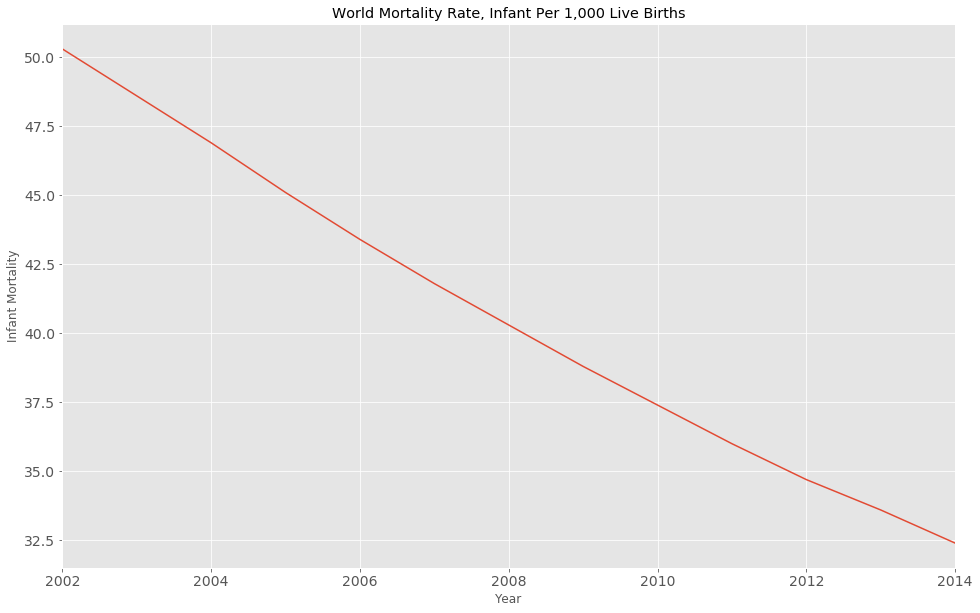

In [10]:
# Plotting world's mortality in a line graph, and observing the trend.
world_Mort_plot = world_Mort.plot.line(legend=False, fontsize=14, figsize=(16,10),
                            title='World Mortality Rate, Infant Per 1,000 Live Births')
world_Mort_plot.set_ylabel('Infant Mortality')
world_Mort_plot.set_xlabel('Year')

colors = ['Red', 'Plum', 'Yellow', 'Green', 'Blue', 'Orange', 'Purple', 'Gold',
          'Magenta', 'Grey', 'Salmon', 'Brown', 'Sienna', 'Cyan', 'Tan', 
          'Teal', 'Lime', 'Crimson', 'Indigo']
pp.show()

In [11]:
# Drawing a Scatter plot in plotly to see how world's mortality rate, infant per 1000
# live births is affected by the world's healthcare expenditure per capita.

trace1=go.Scatter(x=world_heal.index, y=world_heal, name = 'Health Expenditure per capita [US$]')
trace2=go.Scatter(x=world_Mort.index, y=world_Mort, name = 'Infant Mortality rate [per 1000 live births]', yaxis='y2')
data1 = [trace1, trace2]
layout1=go.Layout(title='Health Expenditure [MillionsUS$] - Infant Mortality [per 1000 live births] for World', yaxis=dict(
    title='Health Expenditure per capita [US$]'), yaxis2=dict(title='Mortality rate [per 1000 live births]', 
                                                       titlefont = dict(color='rgb(148, 103, 189)'),
                                                       tickfont = dict(color='rgb(148, 103, 189)'),
                                                       overlaying='y', side='right'))
fig1=go.Figure(data=data1, layout=layout1)
Fig1 = py.iplot(fig1, validate=True, filename='Health expd - Mortality rate')
Fig1

In [12]:
# Creating a time series plot in Plotly that displays Health expenditure per capita with respect to infant
# mortality rate per 1000 live births for the world each year from 2002 to 2014. 

trace3=go.Scatter(x=world_heal, y=world_Mort, 
                  name = 'Infant Mortality per 1000 live births vs Health Expenditure per capita [US$]')
data2 = go.Data([trace3])
layout3=go.Layout(title='Infant Mortality per 1000 live births vs Health Expenditure[US$]- World ', yaxis=dict(
    title='Infant Mortality per 1000 live births'), xaxis=dict(title='Health Expenditure per capita [US$]'))
fig2=go.Figure(data=data2, layout=layout3)
Fig2 = py.iplot(fig2, validate=True, filename='Health expt vs Infant Mort')
Fig2

In [13]:
# Let's see health expenditure per capita for different countries from 2002 to 2014.
Data_healpcT = Data_healpc.transpose()
del Data_healpcT['World']
Data_healpcT

Country,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2002,0.0,15.481904,28.190597,89.916155,1450.796471,879.285149,223.906095,41.990914,0.0,442.608374,...,0.0,0.0,21.763540,47.695781,84.100028,0.0,27.439314,201.795583,26.080840,32.640269
2003,0.0,19.332368,37.448429,112.630118,1827.841755,907.582626,277.938444,51.508991,0.0,470.783839,...,0.0,0.0,24.999990,63.523390,95.592197,0.0,35.012167,308.092285,35.075922,29.211554
2004,0.0,20.890002,53.456437,153.262550,2127.736748,915.423063,323.750243,65.490677,0.0,462.489128,...,0.0,0.0,30.132586,73.601028,107.444552,0.0,38.383320,380.127458,38.865161,32.170873
2005,0.0,21.895803,64.685192,166.227929,2089.667762,935.016228,389.818276,86.100790,0.0,532.734169,...,0.0,0.0,36.800537,72.970129,115.595250,0.0,42.536105,414.145223,52.273835,28.525177
2006,0.0,22.181409,102.379225,175.461113,2256.103002,998.785170,447.168973,98.224167,0.0,590.239416,...,0.0,0.0,43.445462,81.114896,130.651254,0.0,52.095753,419.290464,62.922780,21.248774
2007,0.0,26.988947,106.602519,216.943081,2997.572747,1101.014301,539.237773,134.060440,0.0,652.248318,...,0.0,0.0,54.988037,87.838745,164.374139,0.0,58.088157,453.886696,48.175662,17.804017
2008,0.0,33.805189,163.116051,254.735035,3081.870220,1338.926703,673.842105,149.383034,0.0,740.688542,...,0.0,0.0,63.290261,98.845139,152.575374,0.0,69.685148,441.238560,66.538544,16.213711
2009,0.0,43.525440,160.835478,238.070979,2897.932041,1332.630130,711.954196,132.517204,0.0,679.680409,...,0.0,0.0,73.220757,103.162980,160.044923,0.0,65.913927,486.706627,53.659674,37.207024
2010,0.0,52.885761,131.796211,219.273857,3173.991691,1349.448657,738.480823,143.064424,0.0,732.681176,...,0.0,0.0,83.458916,139.719429,201.415009,0.0,67.748743,618.350112,64.175104,36.362794
2011,0.0,52.382549,160.360723,255.255600,2794.502813,1473.339096,795.750293,127.005932,0.0,724.019508,...,0.0,0.0,94.105251,125.941965,235.760548,0.0,64.651604,686.941220,70.525818,48.469580


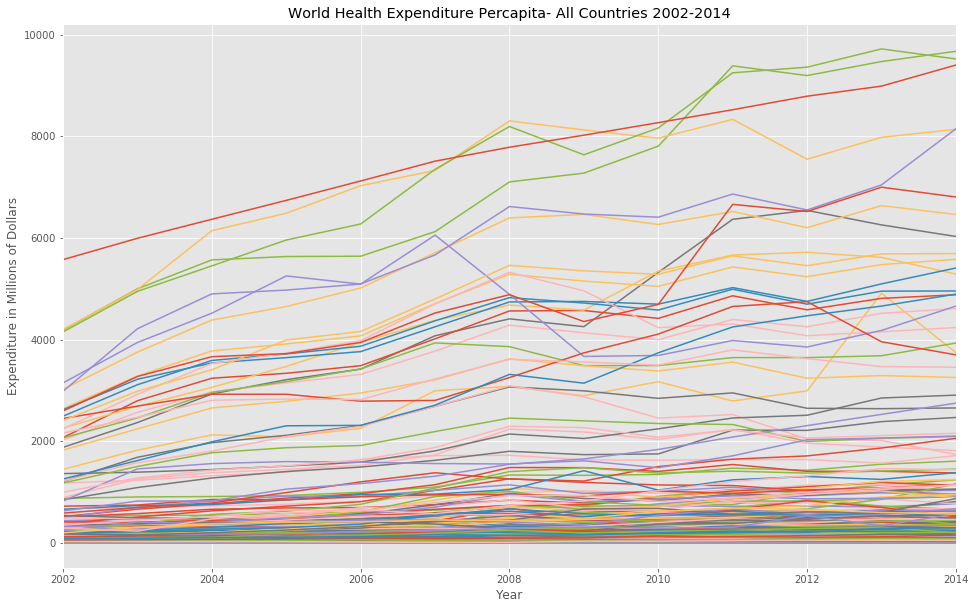

In [14]:
## Drawing a time series plot to see health care expenditure percapita of all the countries
# of the world from 2002-2014.

Data_healpc_plot = Data_healpcT.plot(legend= False, figsize =(16,10), title = 'World Health Expenditure Percapita- All Countries 2002-2014')
Data_healpc_plot.set_ylabel('Expenditure in Millions of Dollars')
Data_healpc_plot.set_xlabel('Year')
pp.show()


In [15]:
#Lets draw time seris plot for infant mortality per 1000 live births from 2002 to 2014.
# Dropping unneded item and creating time seris plot for 
# mortality rate, infant per 1000 live births from 2002 to 2014.

Data_MIPBT = Data1_MIPB.transpose()
del Data_MIPBT['World']
Data_MIPBT.head()


Country,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2002,0.0,86.1,115.8,20.9,3.7,9.1,16.2,24.1,0.0,11.7,...,0.0,0.0,22.0,23.7,17.6,0.0,62.9,48.3,85.0,61.0
2003,0.0,83.6,111.3,20.0,3.6,8.9,15.7,23.0,0.0,11.1,...,0.0,0.0,21.3,23.7,17.3,0.0,60.0,49.1,78.8,61.2
2004,0.0,81.1,106.6,19.0,3.5,8.6,15.2,21.9,0.0,10.5,...,0.0,0.0,20.6,23.7,17.0,0.0,57.3,49.3,72.6,61.8
2005,0.0,78.5,101.5,18.2,3.3,8.4,14.8,20.8,0.0,9.9,...,0.0,0.0,20.2,23.8,16.7,0.0,54.6,48.9,66.9,62.3
2006,0.0,76.0,96.3,17.4,3.3,8.2,14.4,19.8,0.0,9.4,...,0.0,0.0,19.8,23.9,16.5,0.0,52.0,47.4,63.1,62.8


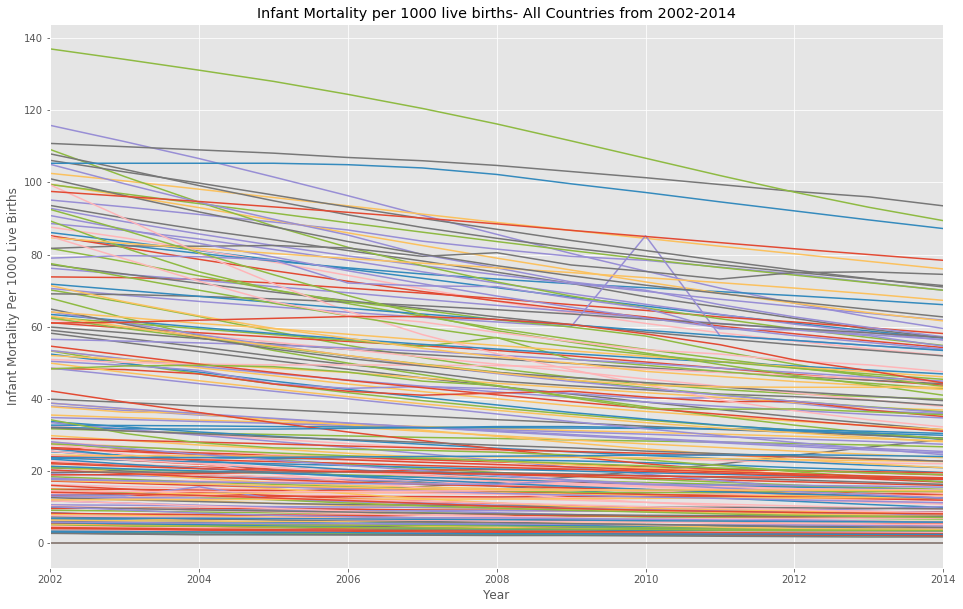

In [16]:
# Drawing plot for infant mortality from 2002-2014, for all the countries of the world.
Data_MIPB_plot = Data_MIPBT.plot(legend= False, figsize =(16,10), 
                                 title = 'Infant Mortality per 1000 live births- All Countries from 2002-2014')
Data_MIPB_plot.set_ylabel('Infant Mortality Per 1000 Live Births')
Data_MIPB_plot.set_xlabel('Year')
pp.show()

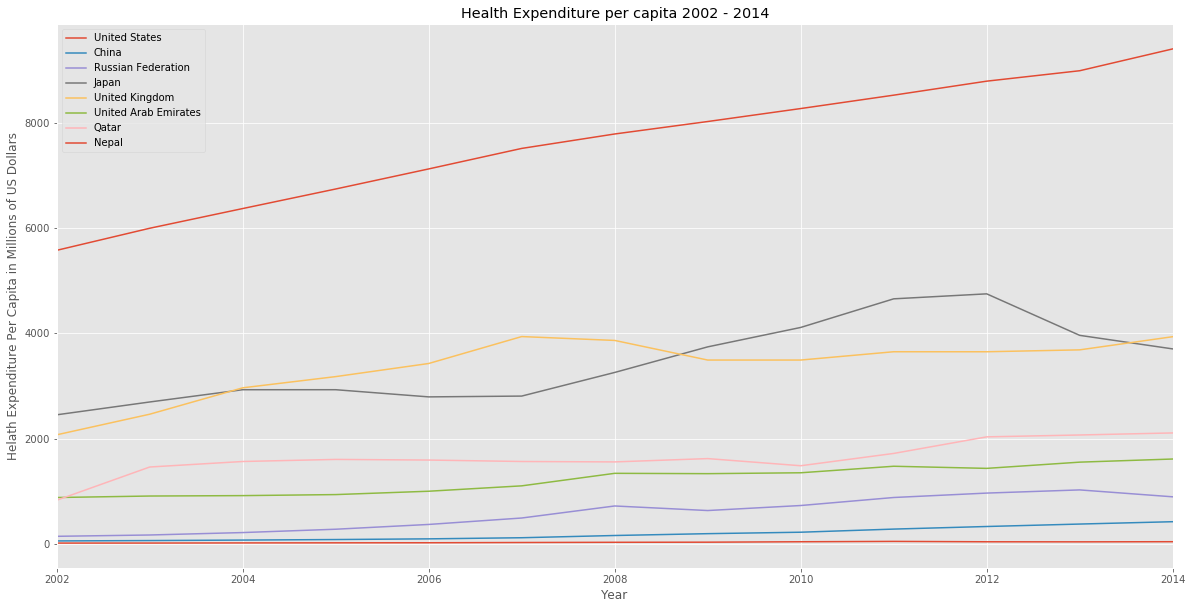

In [17]:
# Creating a function to draw Health Expenditure per capita [US$] for a paricular country each year
#from 2002 - 2014

def drawhealthexpd(Country):
    Data_healpc.loc[Country].plot(legend=True, figsize=(20, 10),
                                           title='Health Expenditure per capita 2002 - 2014')
pp.ylabel('Helath Expenditure Per Capita in Millions of US Dollars')
pp.xlabel('Year')
drawhealthexpd('United States')
drawhealthexpd('China')
drawhealthexpd('Russian Federation')
drawhealthexpd('Japan')
drawhealthexpd('United Kingdom') 
drawhealthexpd('United Arab Emirates')
drawhealthexpd('Qatar')
drawhealthexpd('Nepal')

pp.show()

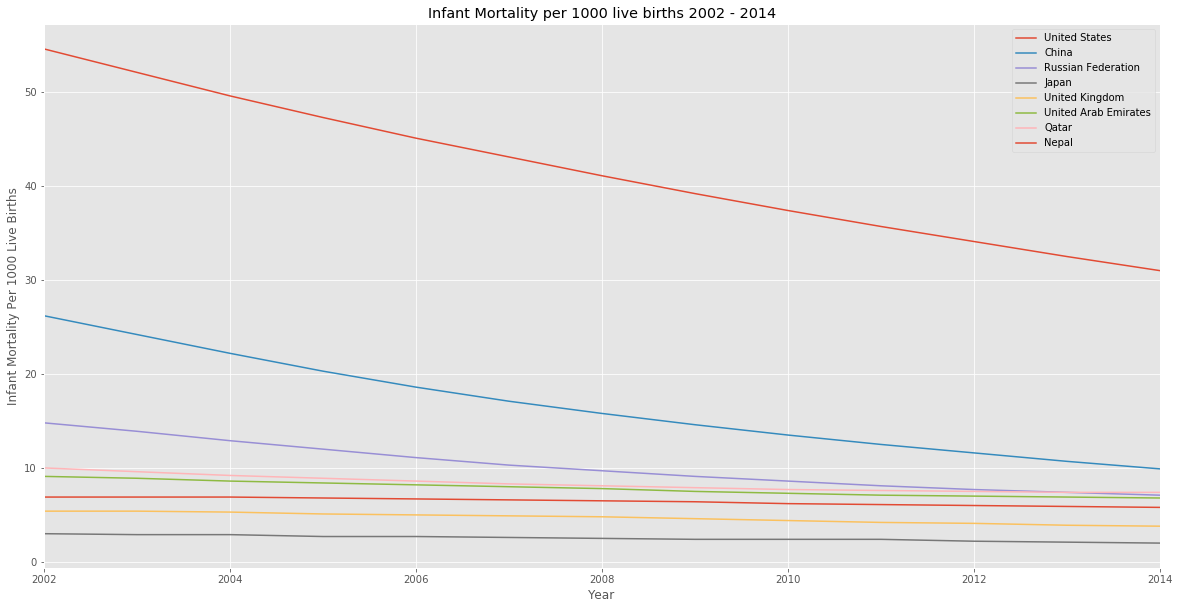

In [18]:
# Creating a function and randomly selecting countries to see how they are doing in mortality 
# rate, infant from 2002-2014.

def drawmortality(Country):
    Data1_MIPB.loc[Country].plot(legend=True, figsize=(20, 10),
                                    title='Infant Mortality per 1000 live births 2002 - 2014')
    pp.ylabel('Infant Mortality Per 1000 Live Births')
    pp.xlabel('Year')
drawmortality('United States')
drawmortality('China')
drawmortality('Russian Federation')
drawmortality('Japan')
drawmortality('United Kingdom') 
drawmortality('United Arab Emirates')
drawmortality('Qatar')
drawmortality('Nepal')
pp.show()

In [19]:
# Calculating average(mean) expenditure per capita and comparing the trend, with average 
# infant mortality.

Data_healpc1 =(pd.read_excel('API_SH.XPD.PCAP_DS2_en_excel2_v2-3-8.xls', skiprows = 3,sep=',',
 
                             usecols=(0,1, 46,47,48,49,50,51,52,53,54,55,56,57,58))).fillna(0)
Data_healpc1['Mean Expenditure'] = Data_healpc1.mean(axis=1)
Data_healpc1.head()


df = Data_healpc1[["Country", "Mean Expenditure", "Country Code"]]
df.head(10)


,Country,Mean Expenditure,Country Code
0,Aruba,0.000000,ABW
1,Afghanistan,36.729070,AFG
2,Angola,121.691733,AGO
3,Albania,203.602729,ALB
4,Andorra,2796.343899,AND
5,United Arab Emirates,1217.438658,ARE
6,Argentina,552.713900,ARG
7,Armenia,115.369786,ARM
8,American Samoa,0.000000,ASM
9,Antigua and Barbuda,633.984370,ATG


In [20]:
# Displaying the world's mean health expenditure in a geomap per capita in current US 
# Dollars from 2002-2014.

data3 = [dict(type='choropleth', 
             locations =df["Country Code"],
             z = df["Mean Expenditure"],
             text=df["Country"],
             colorscale = [[0, "rgb(5, 10, 172)"],[0.35, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                         [0.6, "rgb(90, 120, 245)"], [0.7, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
             autocolorscale = False,
             reversescale = True, 
             marker=dict(
                 line=dict(
                     color = "rgb(180, 180, 180)",
                     width = 0.5
                 )),
             colorbar = dict(
                 autotick = False, 
                 tickprefix = '$',
                 title = 'Mean Health expenditure Percapita'),
            )]
layout1 = dict(
    title = "Mean Expenditure Percapita 2002-2014",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = "choropleth"
        )
    )
)
fig3=dict(data=data3, layout=layout1)
py.iplot(fig3, validate=False, filename="Geomap_health_exp_mean_world")


In [21]:
# Display the world's mean Mortality per 1000 live births from 2002-2014.

Data1_MIPB = (pd.read_excel('API_SP.DYN.IMRT.IN_DS2_en_excel2_v2-6-2.xls',skiprows = 3, sep=',',
    usecols=(0, 1, 46,47,48,49,50,51,52,53,54,55,56,57,58))).fillna(0)
Data1_MIPB['Mean Mortality'] = Data1_MIPB.mean(axis=1)
Data1_MIPB.head()
df1 = Data1_MIPB[["Country", "Mean Mortality", "Country Code"]]
df1.head()


,Country,Mean Mortality,Country Code
0,Aruba,0.000000,ABW
1,Afghanistan,71.023077,AFG
2,Angola,86.392308,AGO
3,Albania,16.361538,ALB
4,Andorra,3.123077,AND


In [22]:
# Displaying the world's mean infant mortality per 1000 live births in a geomap 
# from 2002-2014.

data4 = [dict(type='choropleth', 
             locations =df1["Country Code"],
             z = df1["Mean Mortality"],
             text=df1["Country"],
             colorscale = [[0, "rgb(5, 10, 172)"],[0.35, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                         [0.6, "rgb(90, 120, 245)"], [0.7, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
             autocolorscale = False,
             reversescale = True, 
             marker=dict(
                 line=dict(
                     color = "rgb(180, 180, 180)",
                     width = 0.5
                 )),
             colorbar = dict(
                 autotick = False, 
                 tickprefix = '',
                 title = 'Mean Infant Mortality per 1000 live births'),
            )]
layout2 = dict(
    title = "Mean Infant Mortality per 1000 live births 2002-2014",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = "choropleth"
        )
    )
)
fig4=dict(data=data4, layout=layout2)
py.iplot(fig4, validate=False, filename="Geomap_Mortality_mean_world")

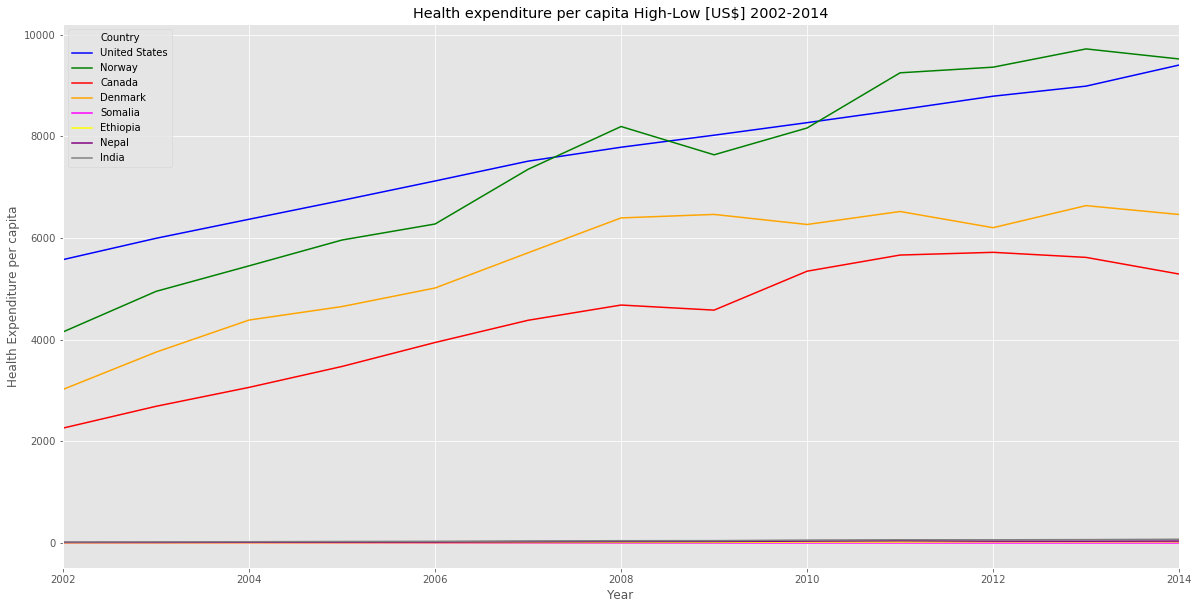

In [23]:
# Health Expenditure per capita by countries 2002-2014; some high and low countires
# as seen from the plotly map

colors = ['Blue', 'Green', 'Red', 'Orange', 'Magenta', 'Yellow', 'Purple', 'Grey', 'Salmon', 'Brown']
AverageExpdHiLo = Data_healpcT[['United States', 'Norway', 'Canada', 'Denmark', 'Somalia',
                                                         'Ethiopia', 'Nepal','India']]

AverageExpdHiLoplot = AverageExpdHiLo.plot.line(legend = True, color = colors, figsize=(20, 10),
                                                              title='Health expenditure per capita High-Low [US$] 2002-2014')
AverageExpdHiLoplot.set_ylabel('Health Expenditure per capita')
AverageExpdHiLoplot.set_xlabel('Year')
pp.show()

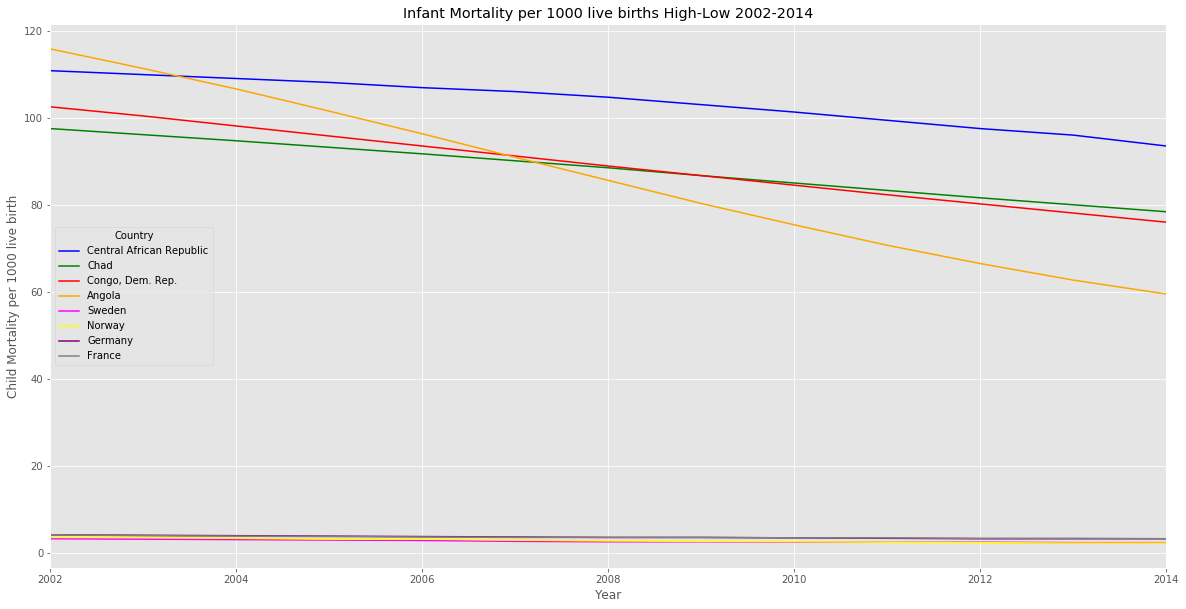

In [24]:
# Infant Mortality per 1000 live births 2002-2014; some high and low countires as seen from the plotly map

AverageMortHiLo = Data_MIPBT[['Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Angola',
                                                        'Sweden', 'Norway', 'Germany', 'France' ]]

AverageMortHiLoPlot = AverageMortHiLo.plot.line(legend = True, color = colors, figsize=(20, 10),
                                                              title='Infant Mortality per 1000 live births High-Low 2002-2014')
AverageMortHiLoPlot.set_xlabel('Year')
AverageMortHiLoPlot.set_ylabel('Child Mortality per 1000 live birth')
pp.show()

In [25]:
# Let's draw a time series plot that shows Health Expenditure per capita and infant mortality per 1000 live births
# from 2002 to 2014 for "United states", "Norway" and "Canada" (as these are the countries with high Health expenditure)

HealthexpdUSA = Data_healpc.loc["United States"]
HealthexpdNorway= Data_healpc.loc["Norway"]
HealthexpdCanada= Data_healpc.loc["Canada"]

MortUSA = Data_MIPB.loc["United States"]
MortNorway = Data_MIPB.loc["Norway"]
MortCanada = Data_MIPB.loc["Canada"]

trace1=go.Scatter(x=HealthexpdUSA.index, y=HealthexpdUSA, name = 'HealthE-Expenditure-USA [US$]')
trace2=go.Scatter(x=MortUSA.index, y=MortUSA, name = 'Infant-Mortality-USA', yaxis='y2')
trace3=go.Scatter(x=HealthexpdNorway.index, y=HealthexpdNorway, name = 'Health-Expenditure-Norway [US$]')
trace4=go.Scatter(x=MortNorway.index, y=MortNorway, name = 'Infant-Mortality-Norway', yaxis='y2')
trace5=go.Scatter(x=HealthexpdCanada.index, y=HealthexpdCanada, name = 'Health-Expenditure-Canada [US$]')
trace6=go.Scatter(x=MortCanada.index, y=MortCanada, name = 'Infant-Mortality-Canada', yaxis='y2')
data5 = [trace1, trace2, trace3, trace4, trace5, trace6 ]
layout3=go.Layout(title='Health expenditure per capita vs Infant mortality per 1000 live births ', yaxis=dict(
    title='Health Expenditure per capita [US$]'), yaxis2=dict(title='Infant-Mortality per 1000 live births', 
                                                       titlefont = dict(color='rgb(148, 103, 189)'),
                                                       tickfont = dict(color='rgb(148, 103, 189)'),
                                                       overlaying='y', side='right'))
fig5=go.Figure(data=data5, layout=layout3)
py.iplot(fig5,validate=False, filename='Health-expd-Infant-mort USA-Norway-Canada')



In [26]:
# Let's draw a plot that shows Health Expenditure per capita vs infant mortality per 1000 live births
# from 2002 to 2014 for "United states", "Norway" and "Canada" 

trace11=go.Scatter(x=HealthexpdUSA, y=MortUSA, name = 'USA')
trace22=go.Scatter(x=HealthexpdNorway, y=MortNorway, name = 'Norway')
trace33=go.Scatter(x=HealthexpdCanada, y=MortCanada, name = 'Canada')
data7 = go.Data([trace11, trace22, trace33])

layout4=go.Layout(title='Infant Mortality per 1000 live births vs Health Expenditure per capita[US$]', yaxis=dict(
    title='Infant Mortality per 1000 live births'), xaxis=dict(title='Health Expenditure per capita [US$]'))
fig7=go.Figure(data=data7, layout=layout4)
Fig7 = py.iplot(fig7, validate=False, filename='Mort vs expd for selected countries')
Fig7

In [27]:
# Let's draw a time series plot that shows Health Expenditure per capita and infant mortality per 1000 live births
# from 2002 to 2014 for "Central African Republic", "Chad", and "Congo, Dem. Rep." (as these are the countries
# with low Health expenditure)

HealthexpdAfrican = Data_healpc.loc["Central African Republic"]
HealthexpdChad= Data_healpc.loc["Chad"]
HealthexpdCongo=Data_healpc.loc["Congo, Dem. Rep."]

MortAfrican = Data_MIPB.loc["Central African Republic"]
MortChad = Data_MIPB.loc["Chad"]
MortCongo=Data_MIPB.loc["Congo, Dem. Rep."]

trace11=go.Scatter(x=HealthexpdAfrican.index, y=HealthexpdAfrican,
                   name = 'HealthE-Expenditure per capita - Central Afric. Rep. [US$]')
trace22=go.Scatter(x=MortAfrican.index, y=MortAfrican,
                   name = 'Infant-Mortality per 1000 birth - Central Afric. Rep.', yaxis='y2')
trace33=go.Scatter(x=HealthexpdChad.index, y=HealthexpdChad, name = 'Health-Expenditure per capita - Chad [US$]')
trace44=go.Scatter(x=MortChad.index, y=MortChad, name = 'Infant-Mortality per 1000 live births - Chad', yaxis='y2')
trace55=go.Scatter(x=HealthexpdCongo.index, y=HealthexpdCongo, name = 'Health-Expenditure per capita - Congo [US$]')
trace66=go.Scatter(x=MortCongo.index, y=MortCongo, name = 'Infant-Mortality per 1000 live births - Congo', yaxis='y2')
data6 = [trace11, trace22, trace33, trace44, trace55, trace66 ]
layout3=go.Layout(title='Health expenditure per capita and Infant mortality per 1000 live births ', yaxis=dict(
    title='Health Expenditure per capita [US$]'), yaxis2=dict(title='Infant-Mortality per 1000 live births', 
                                                       titlefont = dict(color='rgb(148, 103, 189)'),
                                                       tickfont = dict(color='rgb(148, 103, 189)'),
                                                       overlaying='y', side='right'))
fig6=go.Figure(data=data6, layout=layout3)
py.iplot(fig6,validate=False, filename='Health-expd-Infant-mort Afric-Chad-Congo')

In [28]:
# Let's draw a plot that shows Health Expenditure per capita vs infant mortality per 1000 live births
# from 2002 to 2014 for "Central Afric. Rep.", "Chad" and "Congo" 

trace31=go.Scatter(x=HealthexpdAfrican, y=MortAfrican, name = 'Central African Rep.')
trace12=go.Scatter(x=HealthexpdChad, y=MortChad, name = 'Chad')
trace23=go.Scatter(x=HealthexpdCongo, y=MortCongo, name = 'Congo')
data8 = go.Data([trace31, trace12, trace23])

layout5=go.Layout(title='Infant Mortality per 1000 live births vs Health Expenditure per capita[US$]', yaxis=dict(
    title='Infant Mortality per 1000 live births'), xaxis=dict(title='Health Expenditure per capita [US$]'))
fig8=go.Figure(data=data8, layout=layout5)
Fig8 = py.iplot(fig8, validate=False, filename='Mort-expd for selected countries1')
Fig8

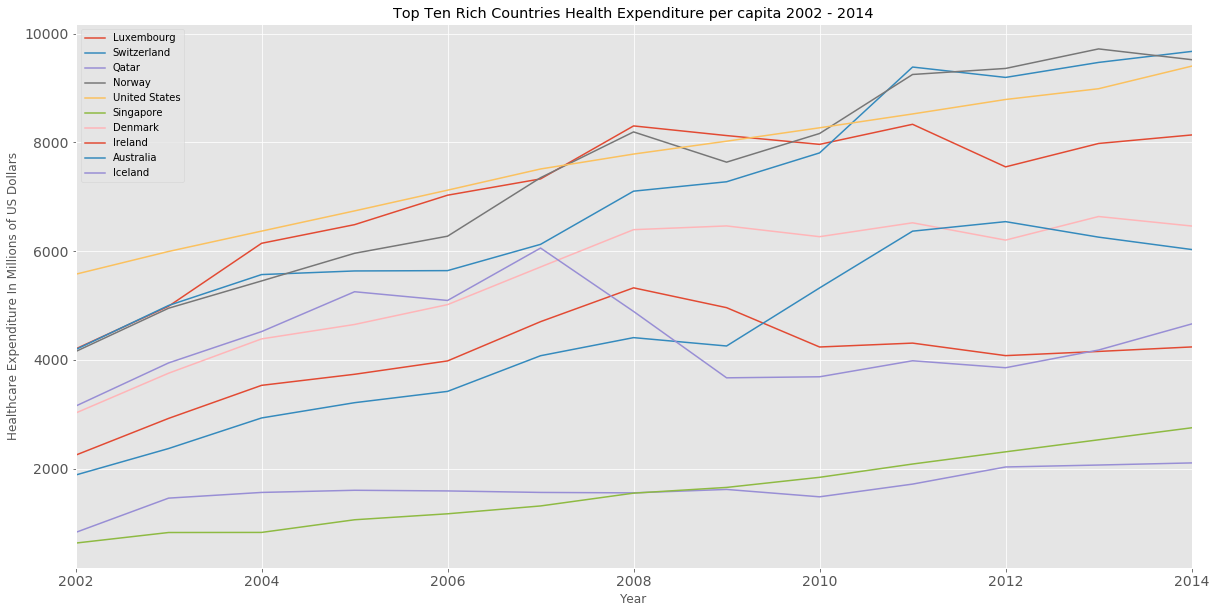

In [29]:
# I would like to see how world's top ten richest countries, are doing in terms 
# of healthcare expenditure per capita and infant mortality.
# Richest countries are selected as per International Monetary Fund's report, and rich and 
# poor is measured interms of their GDP size.

def drawtoptenrich(Country):
    Data_healpc.loc[Country].plot(legend=True, figsize=(20, 10), fontsize =14,
                title='Top Ten Rich Countries Health Expenditure per capita 2002 - 2014')
    pp.xlabel('Year')
    pp.ylabel('Healthcare Expenditure In Millions of US Dollars')

drawtoptenrich('Luxembourg')
drawtoptenrich('Switzerland')
drawtoptenrich('Qatar')
drawtoptenrich('Norway')
drawtoptenrich('United States')
drawtoptenrich('Singapore')
drawtoptenrich('Denmark') 
drawtoptenrich('Ireland')
drawtoptenrich('Australia')
drawtoptenrich('Iceland')

pp.show()


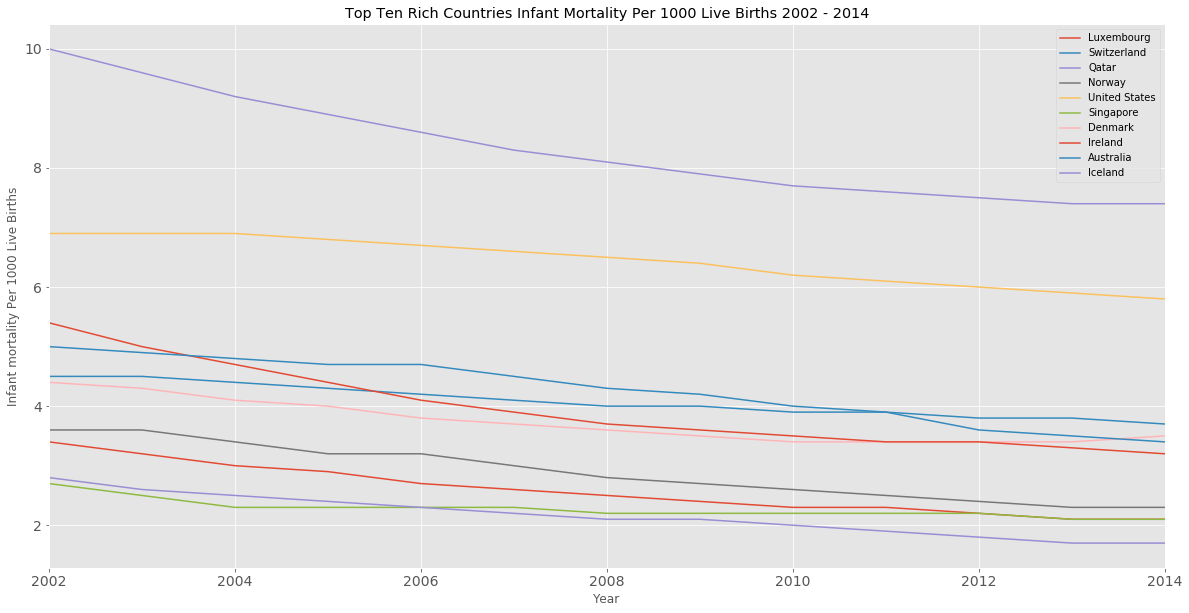

In [30]:
# I would like to see how world's top ten richest countries, are doing in terms 
# of mortality rate per 1000 live births.
# Richest countries are selected as per International Monetary Fund's report, and rich and 
# poor is measured interms of their GDP size.

def drawtoptenrichM(Country):
    Data_MIPB.loc[Country].plot(legend=True, figsize=(20, 10), fontsize =14,
                title='Top Ten Rich Countries Infant Mortality Per 1000 Live Births 2002 - 2014')
    pp.xlabel('Year')
    pp.ylabel('Infant mortality Per 1000 Live Births')

drawtoptenrichM('Luxembourg')
drawtoptenrichM('Switzerland')
drawtoptenrichM('Qatar')
drawtoptenrichM('Norway')
drawtoptenrichM('United States')
drawtoptenrichM('Singapore')
drawtoptenrichM('Denmark') 
drawtoptenrichM('Ireland')
drawtoptenrichM('Australia')
drawtoptenrichM('Iceland')

pp.show()



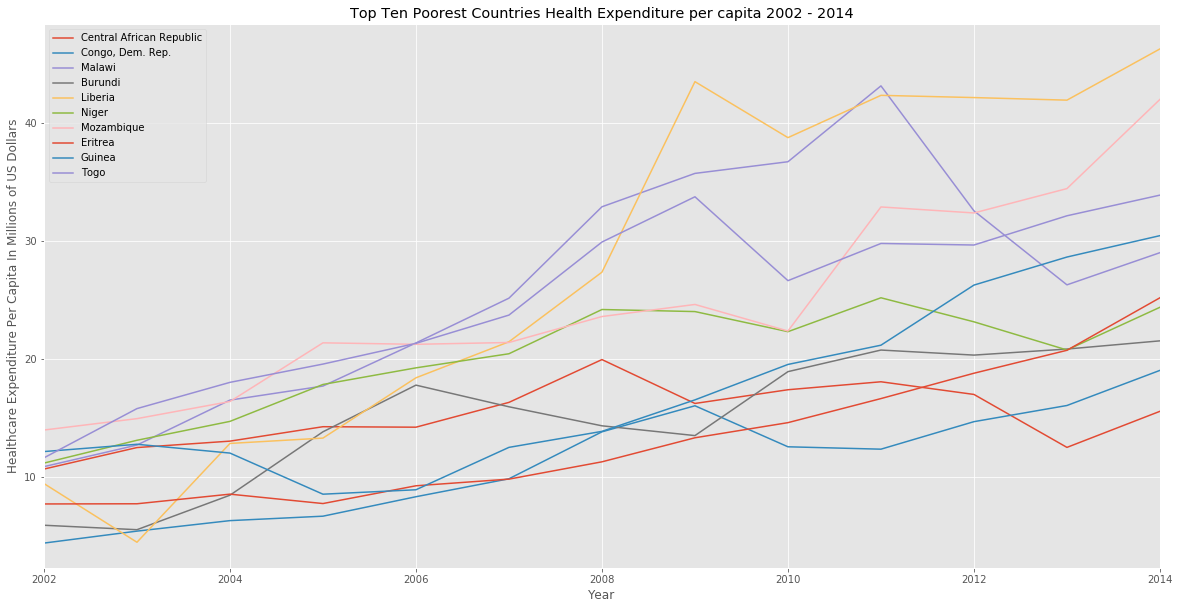

In [31]:
# Defining a function for top ten poorest countries, and plotting their values in line graph 
# to see how they are doing in terms 
# of healthcare expenditure per capita and infant mortality.
# Poorest countries are selected as per International Monetary Fund's report, and rich and 
# poor is measured interms of their GDP size.


def drawtoptenpoor(Country):
    Data_healpc.loc[Country].plot(legend=True, figsize=(20, 10),
                title='Top Ten Poorest Countries Health Expenditure per capita 2002 - 2014')
    pp.xlabel('Year')
    pp.ylabel('Healthcare Expenditure Per Capita In Millions of US Dollars')
    
drawtoptenpoor('Central African Republic')                                                     
drawtoptenpoor('Congo, Dem. Rep.')
drawtoptenpoor('Malawi')
drawtoptenpoor('Burundi')
drawtoptenpoor('Liberia')  
drawtoptenpoor('Niger') 
drawtoptenpoor('Mozambique') 
drawtoptenpoor('Eritrea') 
drawtoptenpoor('Guinea') 
drawtoptenpoor ('Togo')

pp.show()


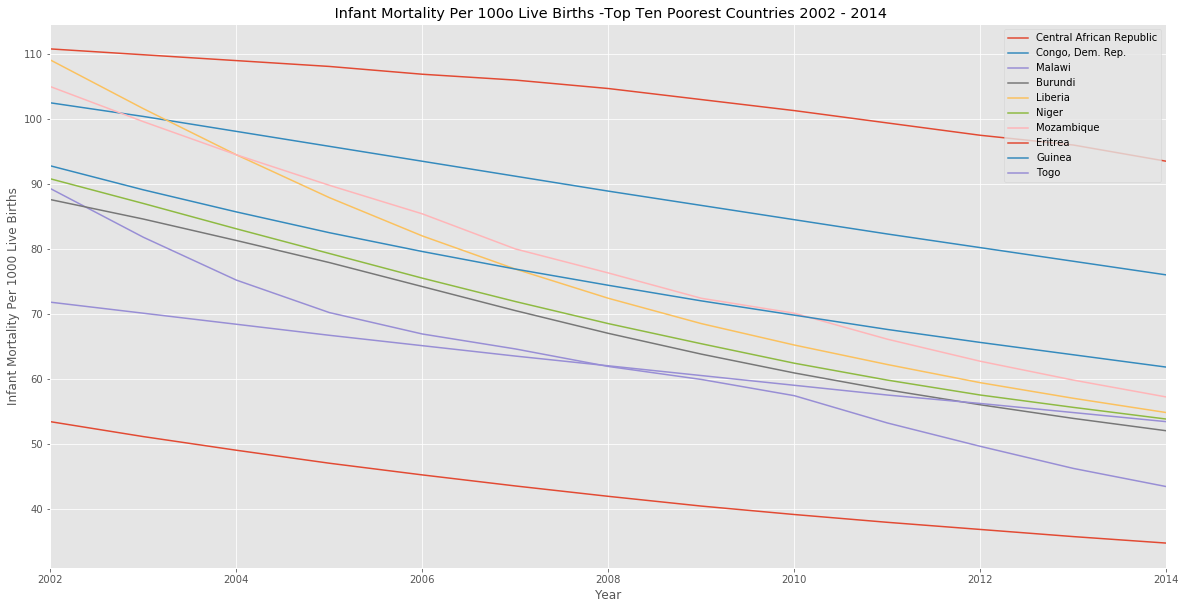

In [32]:
# Defining a function for top ten poorest countries, and plotting their values in line graph
# and observing how they are doing in infant mortality.
# Poorest countries are selected as per International Monetary Fund's report, and rich and 
# poor is measured interms of their GDP size.


def drawtoptenpoorM(Country):
    Data_MIPB.loc[Country].plot(legend=True, figsize=(20, 10),
                title=' Infant Mortality Per 100o Live Births -Top Ten Poorest Countries 2002 - 2014')
    pp.xlabel('Year')
    pp.ylabel('Infant Mortality Per 1000 Live Births')
    
drawtoptenpoorM('Central African Republic')                                                     
drawtoptenpoorM('Congo, Dem. Rep.')
drawtoptenpoorM('Malawi')
drawtoptenpoorM('Burundi')
drawtoptenpoorM('Liberia')  
drawtoptenpoorM('Niger') 
drawtoptenpoorM('Mozambique') 
drawtoptenpoorM('Eritrea') 
drawtoptenpoorM('Guinea') 
drawtoptenpoorM('Togo')

pp.show()


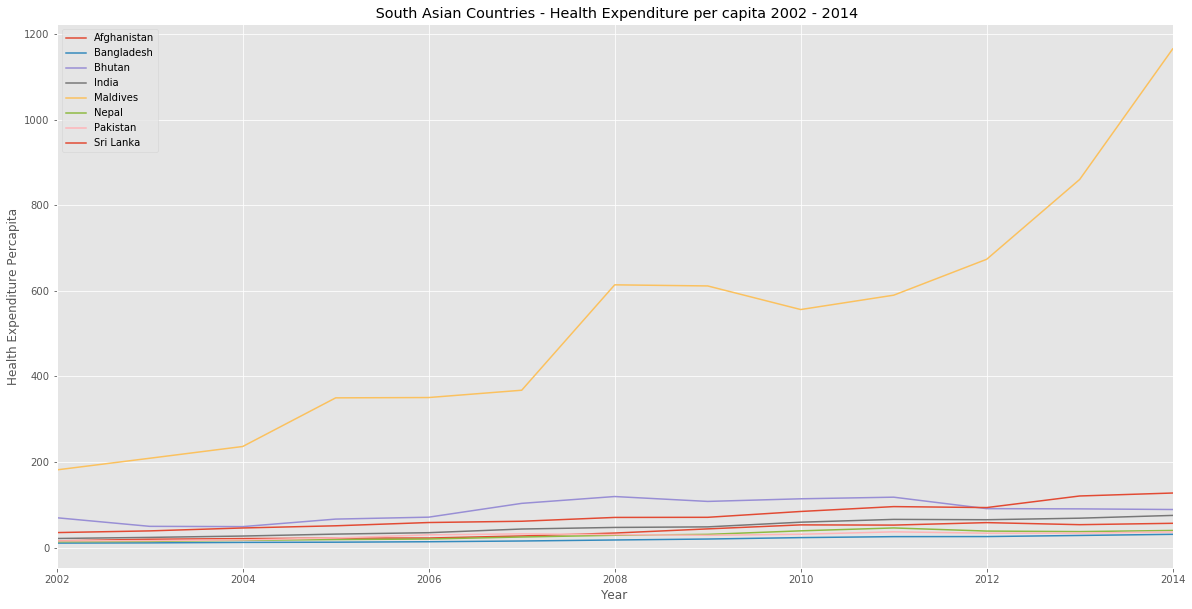

In [33]:
# Observing south asian countries healthcare expenditure percapita trend, and comparing 
# their expenditure with infant mortality rate.
def drawsouthasian(Country):
    Data_healpc.loc[Country].plot(legend=True, figsize=(20,10),
                title=' South Asian Countries - Health Expenditure per capita 2002 - 2014')
    pp.ylabel('Health Expenditure Percapita')
    pp.xlabel('Year')
    
drawsouthasian('Afghanistan')
drawsouthasian('Bangladesh')
drawsouthasian('Bhutan')
drawsouthasian('India')
drawsouthasian('Maldives')
drawsouthasian('Nepal')
drawsouthasian('Pakistan')
drawsouthasian('Sri Lanka')

pp.show()


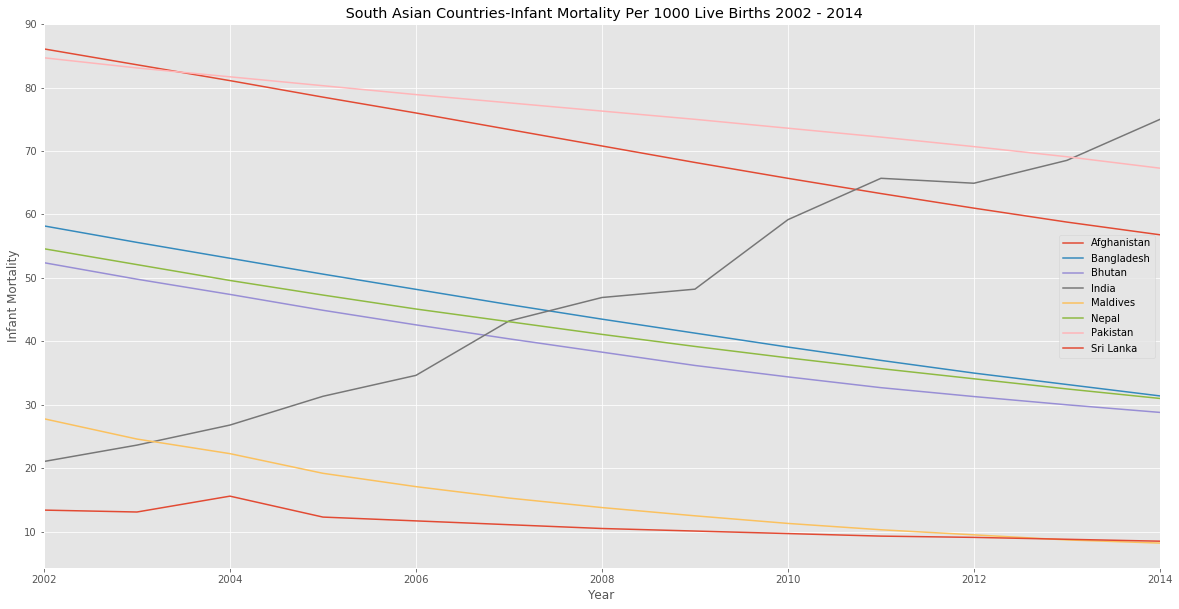

In [34]:
# Defining a function and displaying south asian countries' infant mortality per 1000 
# live births from 2002-2014.
def drawsouthasianM(Country):
    Data_MIPB.loc[Country].plot(legend=True, figsize=(20, 10),
                title=' South Asian Countries-Infant Mortality Per 1000 Live Births 2002 - 2014')
    pp.ylabel('Infant Mortality')
    pp.xlabel('Year')
    
drawsouthasianM('Afghanistan')
drawsouthasianM('Bangladesh')
drawsouthasianM('Bhutan')
drawsouthasian('India')
drawsouthasianM('Maldives')
drawsouthasianM('Nepal')
drawsouthasianM('Pakistan')
drawsouthasianM('Sri Lanka')

pp.show()

In [35]:
# Since Maldives has aggressively increased healthcare expenditure percapita, let's see 
# changes, and compare with the progress in mortality.
expd_maldives = Data_healpc.loc["Maldives"]
expd_maldives

2002     181.365418
2003     208.579654
2004     236.054888
2005     349.729311
2006     350.465307
2007     367.529074
2008     613.813202
2009     611.231229
2010     556.107337
2011     589.644700
2012     673.559445
2013     860.153401
2014    1165.125150
Name: Maldives, dtype: float64

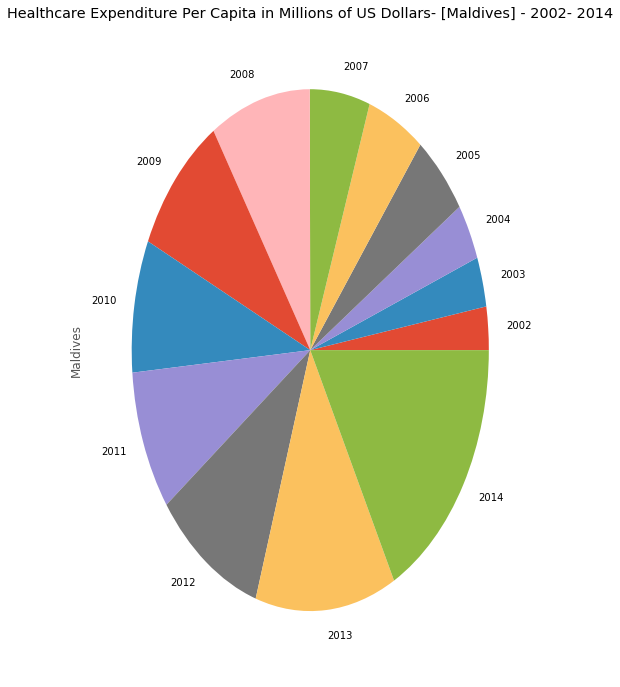

In [36]:
# Plotting expenditure percapita of Maldives in a pie chart(2002-2014).
expd_plot = expd_maldives.plot.pie(figsize=(8,12), 
    title = 'Healthcare Expenditure Per Capita in Millions of US Dollars- [Maldives] - 2002- 2014')
pp.show()

In [37]:
# Displaying infant mortality rate per 1,000 live births, of Maldives from 2002-2014
mort_maldives = Data_MIPB.loc["Maldives"]
mort_maldives

2002    27.8
2003    24.6
2004    22.3
2005    19.2
2006    17.1
2007    15.3
2008    13.8
2009    12.5
2010    11.3
2011    10.3
2012     9.5
2013     8.7
2014     8.2
Name: Maldives, dtype: float64

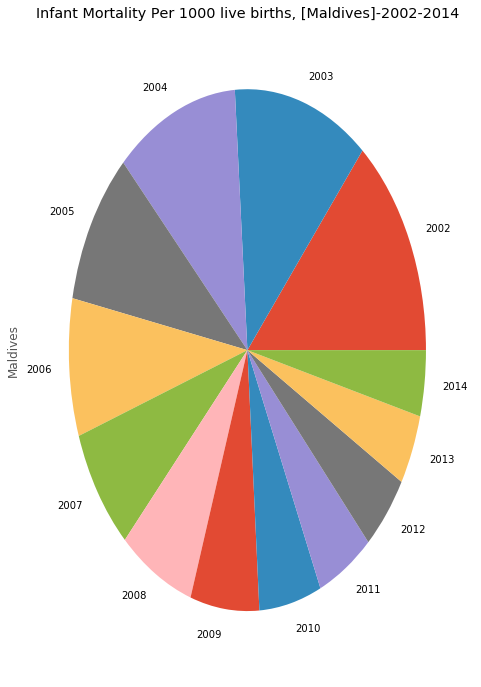

In [38]:
# Plotting infant mortality rate per 1,000 live births, of Maldives from 2002-2014.
mort_plot = mort_maldives.plot.pie(figsize=(8,12),
                    title='Infant Mortality Per 1000 live births, [Maldives]-2002-2014')
pp.show()